In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import toeplitz
import statsmodels.api as sm

with open("./data.txt",'r') as file:
    reader = file.readlines()
    data = np.array([float(line.replace('\n','')) for line in reader])

In [9]:
def reduction(data, k):
    if k==1:
        result = [data[i] - data[i-1] for i in range(1,len(data))]
    else:
        result = data
        for _ in range(k):
            result = reduction(result, 1)

    return np.array(result)

def get_mean(series):
    return np.mean(series)

def get_self_covar(series) -> np.array:
    x_bar = get_mean(series)
    new_series = np.array(series) - x_bar

    n = len(series)
    # scv: tự hiệp phương sai mẫu
    scv = [new_series[i:].dot(new_series[:-i])/n for i in range(1,n)]
    scv.insert(0, new_series.dot(new_series)/n)

    return np.array(scv)

def get_self_corr(series) -> np.array:
    scv = get_self_covar(series)
    return scv / scv[0]

def show_series(series, scatter=False, x=None, y=None):
    plt.rcParams.update({'font.size': 22})
    time = [i for i in range(len(series))]
    fig = plt.figure(figsize=(15,10))
    plt.grid()
    if scatter:
        plt.scatter(time, series)
    else:
        plt.plot(time, series)
    if x is not None and y is not None:
        plt.xlabel(x)
        plt.ylabel(y)
    else:
        plt.xlabel('thời gian')
        plt.ylabel('giá trị')
    plt.show()

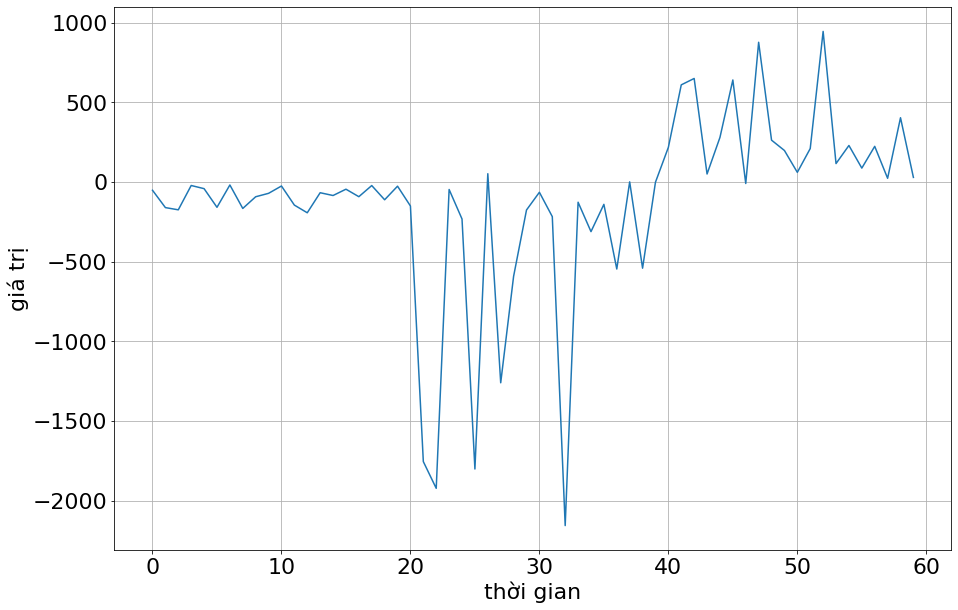

In [11]:
show_series(data)

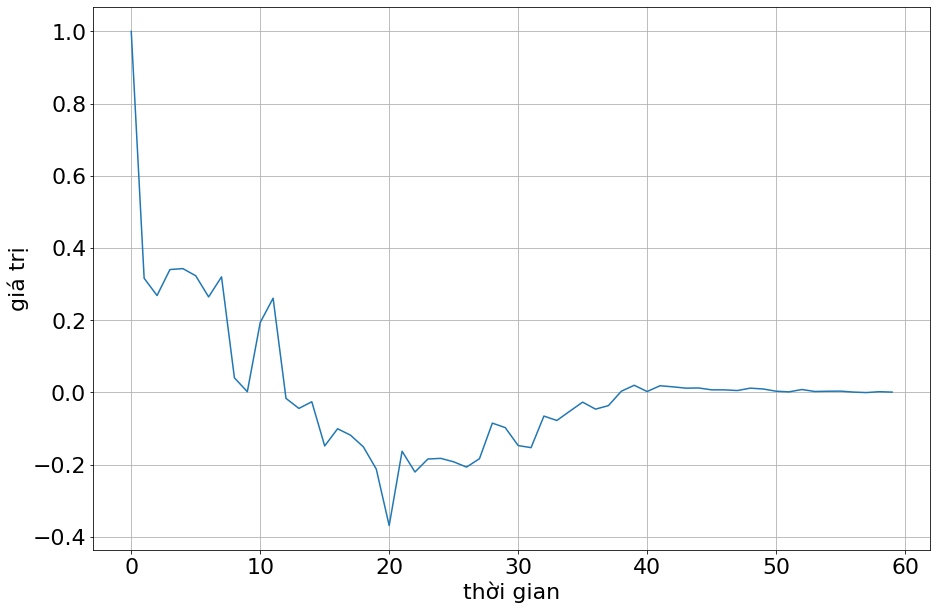

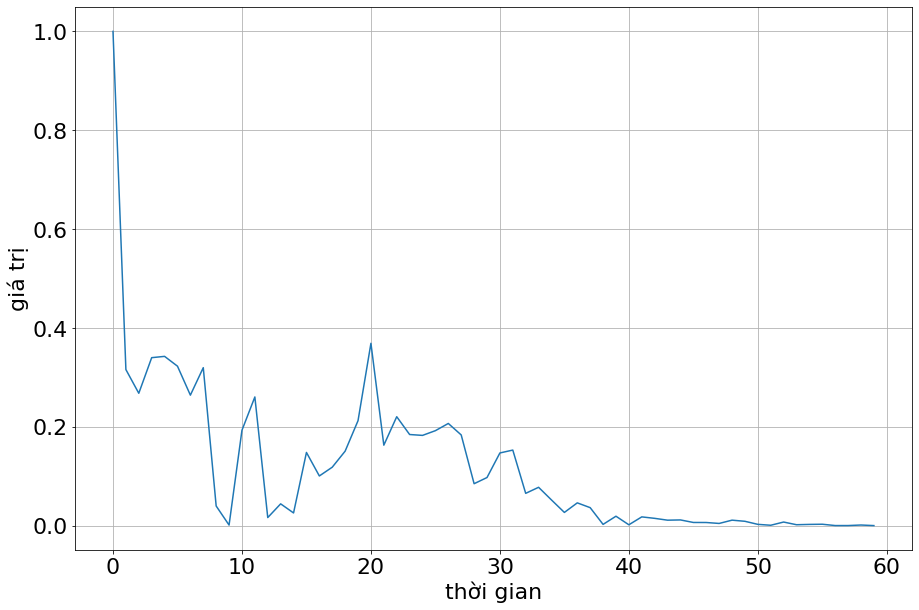

In [12]:
show_series(get_self_corr(data))
show_series(np.abs(get_self_corr(data)))

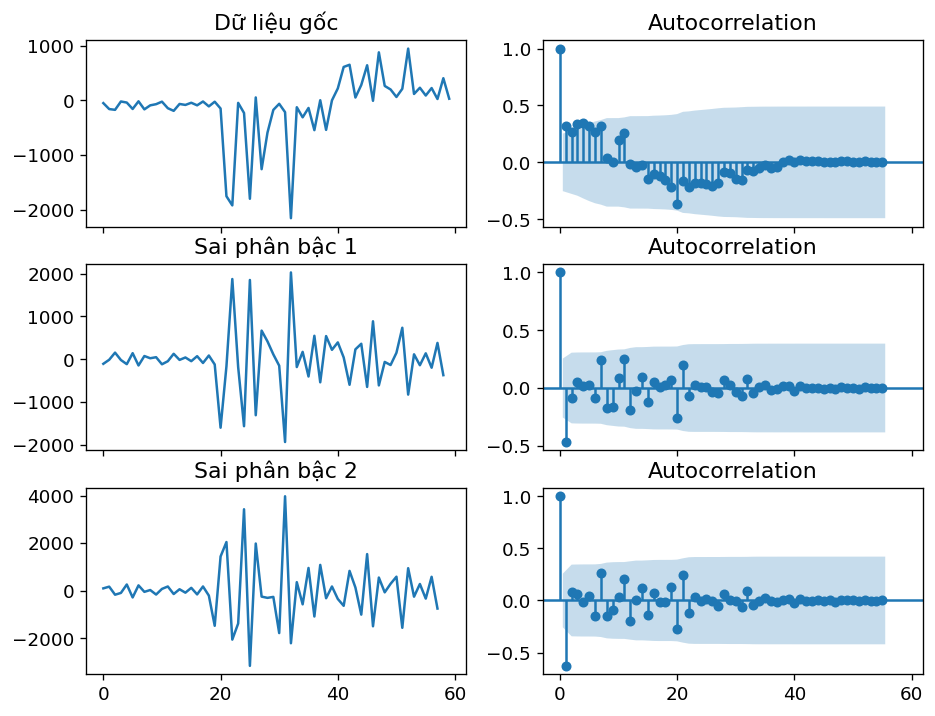

In [13]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
plt.rcParams.update({'font.size': 11})
# Original Series
data = np.array(data)
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(data)
axes[0, 0].set_title('Dữ liệu gốc')
plot_acf(data, ax=axes[0, 1], lags=55)

# 1st Differencing
axes[1, 0].plot(reduction(data,1))
axes[1, 0].set_title('Sai phân bậc 1')
plot_acf(reduction(data,1), ax=axes[1, 1], lags=55)

# 2nd Differencing
axes[2, 0].plot(reduction(data,2))
axes[2, 0].set_title('Sai phân bậc 2')
plot_acf(reduction(data,2), ax=axes[2, 1], lags=55)

plt.show()

In [14]:
new_data = [np.round(item, 4) for item in reduction(data,1)]
new_data

[-108.8144,
 -13.9409,
 152.6455,
 -19.8474,
 -117.05,
 140.1383,
 -147.2395,
 73.3032,
 21.4831,
 46.0108,
 -119.7859,
 -48.2031,
 125.8157,
 -17.4889,
 39.612,
 -46.9791,
 69.8825,
 -89.2236,
 85.2218,
 -124.3229,
 -1604.2039,
 -167.662,
 1875.4138,
 -185.1802,
 -1568.9666,
 1853.2004,
 -1312.1004,
 668.316,
 416.0792,
 111.2036,
 -152.7252,
 -1939.0946,
 2029.3708,
 -184.393,
 171.0424,
 -405.8225,
 547.0776,
 -541.8386,
 539.6884,
 218.6894,
 392.1766,
 40.0909,
 -599.5716,
 229.6345,
 360.5075,
 -649.7296,
 886.3348,
 -614.3135,
 -64.8847,
 -137.1738,
 149.3988,
 735.1352,
 -829.4605,
 113.5613,
 -142.0057,
 136.5414,
 -200.4775,
 380.1353,
 -374.4984]

/home/pdd/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


[-0.4754, -0.4064, -0.3104, -0.2436, -0.1354, -0.2127, 0.245, 0.2327, -0.1398, -0.3908, 0.0623, 0.0841, 0.084, 0.1998, 0.0427, 0.0375, -0.1278, -0.5304, 0.0722, -0.021, 0.041, -0.3271, -0.3883, -0.6156, -0.7263, -2.7226, 1.3715, 0.8112, 1.5136, -1.2095, -3.4842, 1.2289, 0.4037, -0.2848, -0.142, 0.3967, 1.0345, -12.699, -0.963, -1.4801]


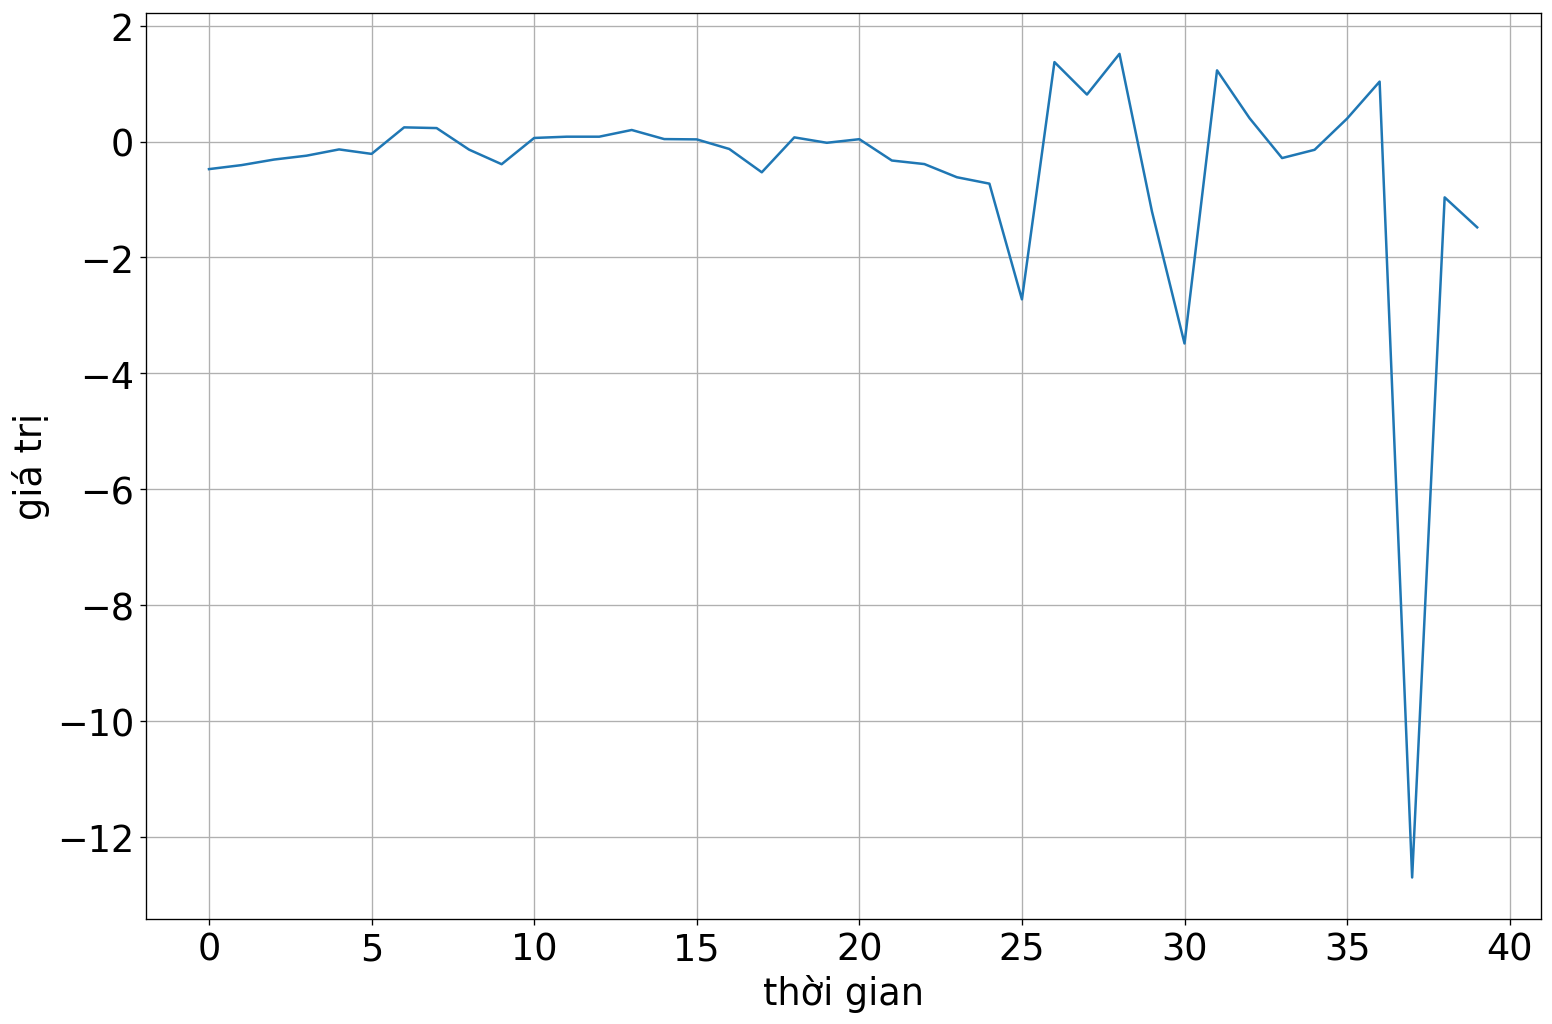

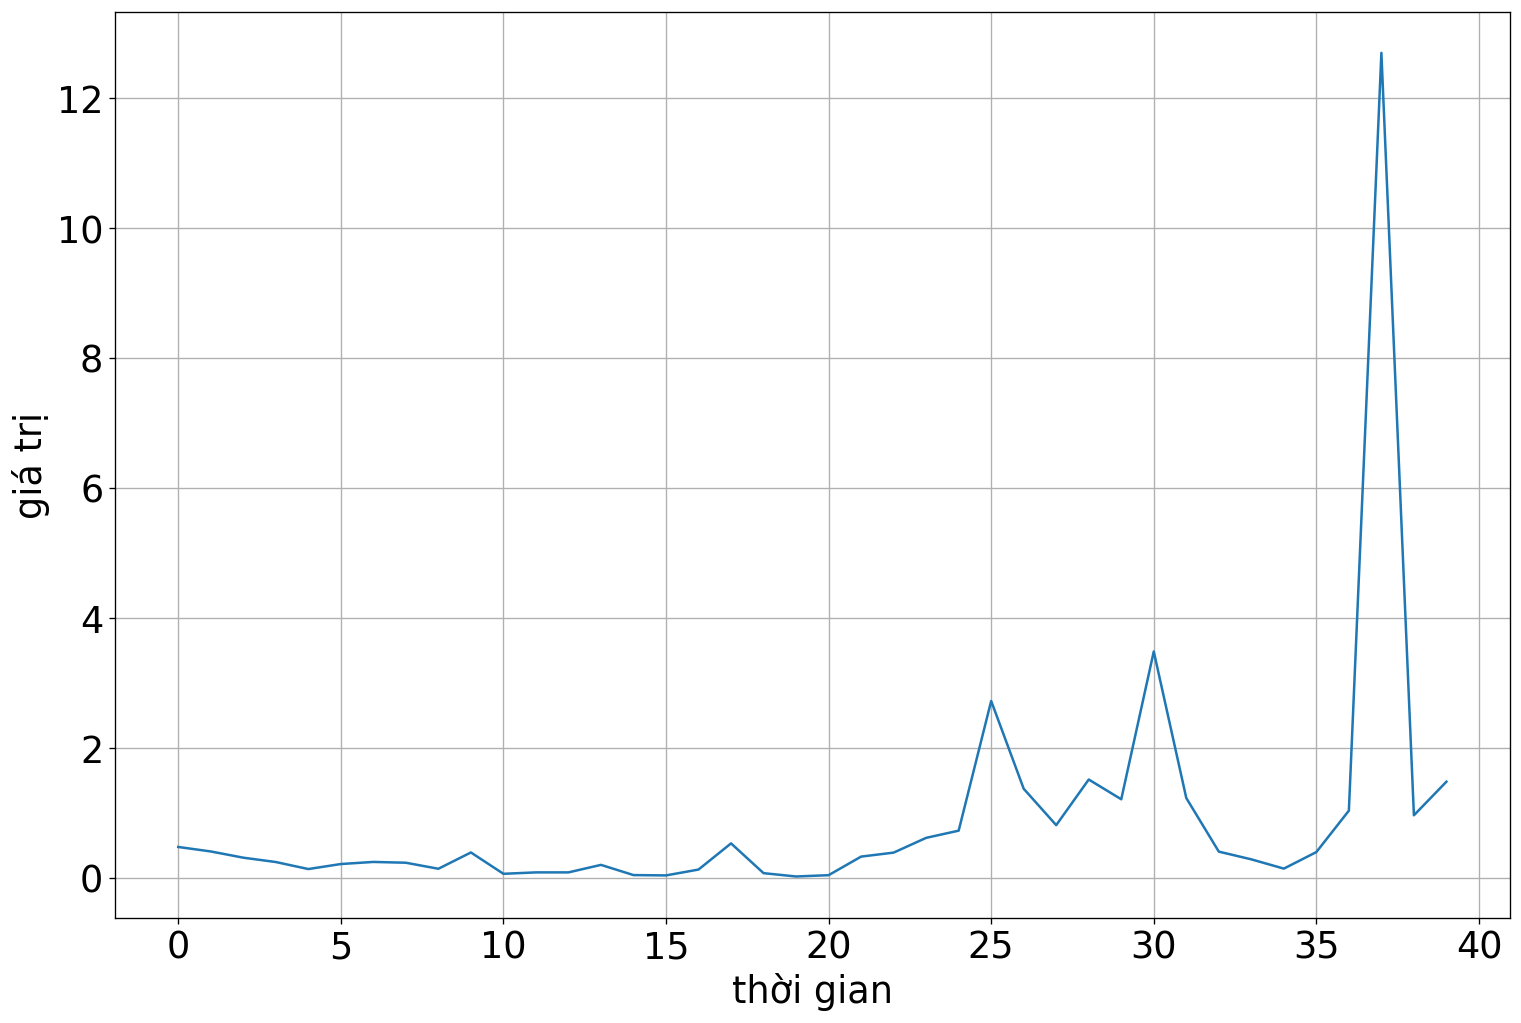

In [37]:
ind_corr = [round(sm.regression.yule_walker(new_data, order=k)[0][-1],4) for k in range(1,41)]
print(ind_corr)
show_series(ind_corr)
show_series(np.abs(ind_corr))

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   59
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -453.954
Method:                       css-mle   S.D. of innovations            527.175
Date:                Thu, 21 Jan 2021   AIC                            915.908
Time:                        22:09:33   BIC                            924.218
Sample:                             1   HQIC                           919.152
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5199     17.491      0.316      0.752     -28.761      39.801
ar.L1.D.y     -0.0698      0.158     -0.441      0.659      -0.380       0.240
ma.L1.D.y     -0.7415      0.100     -7.425      0.0

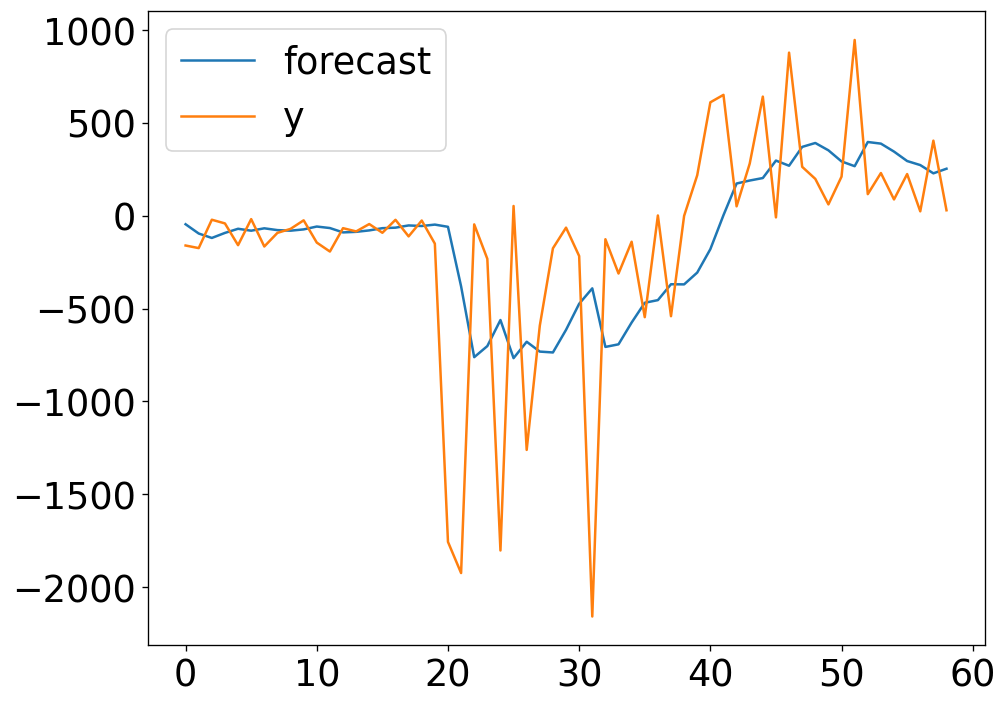

*****************
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   59
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -453.418
Method:                       css-mle   S.D. of innovations            522.093
Date:                Thu, 21 Jan 2021   AIC                            916.836
Time:                        22:09:33   BIC                            927.224
Sample:                             1   HQIC                           920.891
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4269     21.549      0.205      0.837     -37.808      46.662
ar.L1.D.y      0.5470      0.459      1.193      0.233      -0.352       1.446
ma.L1.D.y     -1.4141      0.417  

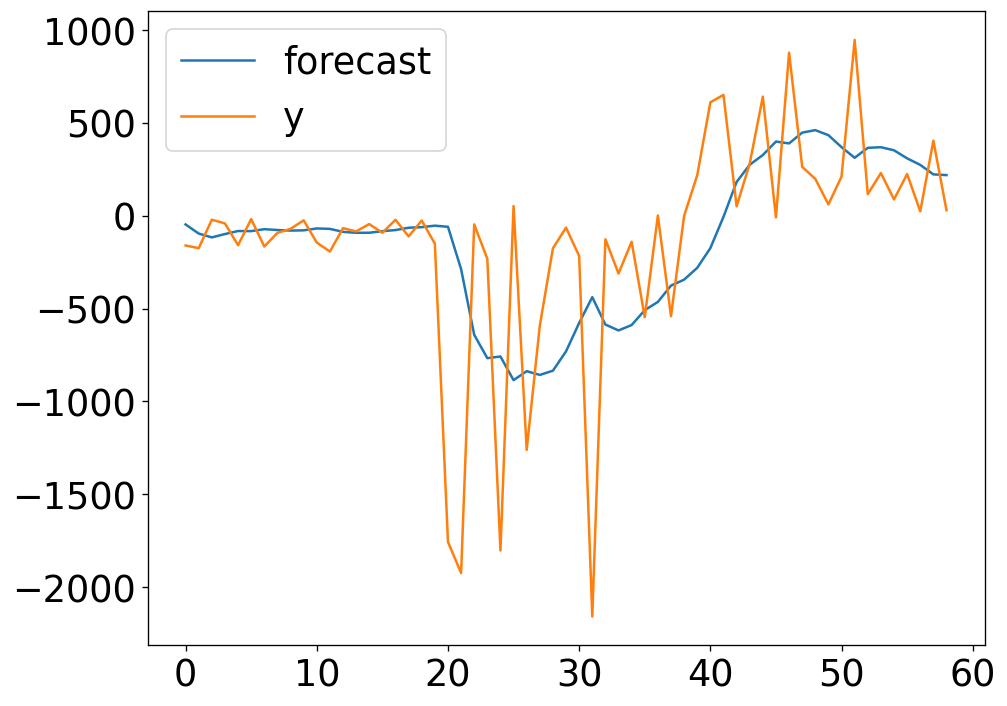

*****************
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   59
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -453.319
Method:                       css-mle   S.D. of innovations            521.246
Date:                Thu, 21 Jan 2021   AIC                            916.637
Time:                        22:09:34   BIC                            927.025
Sample:                             1   HQIC                           920.692
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0655     18.557      0.273      0.785     -31.306      41.437
ar.L1.D.y     -0.1749      0.179     -0.977      0.328      -0.526       0.176
ar.L2.D.y     -0.1831      0.155  

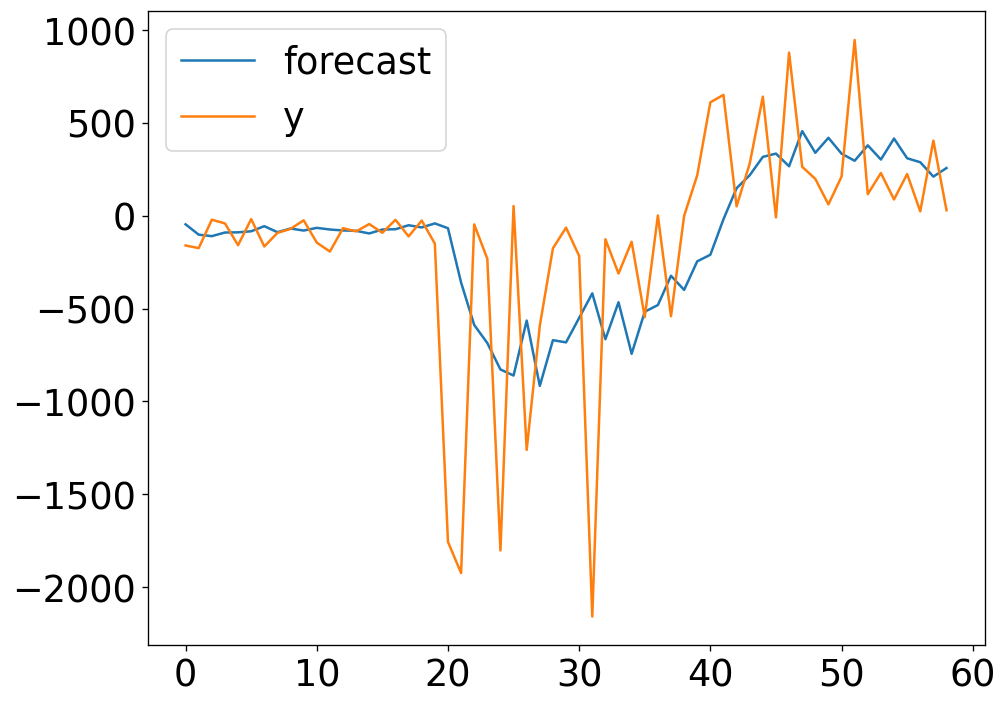

*****************
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   59
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -452.933
Method:                       css-mle   S.D. of innovations            517.629
Date:                Thu, 21 Jan 2021   AIC                            917.867
Time:                        22:09:34   BIC                            930.332
Sample:                             1   HQIC                           922.733
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3622     21.675      0.201      0.841     -38.121      46.845
ar.L1.D.y      0.3060      0.343      0.893      0.372      -0.365       0.977
ar.L2.D.y     -0.2067      0.186  

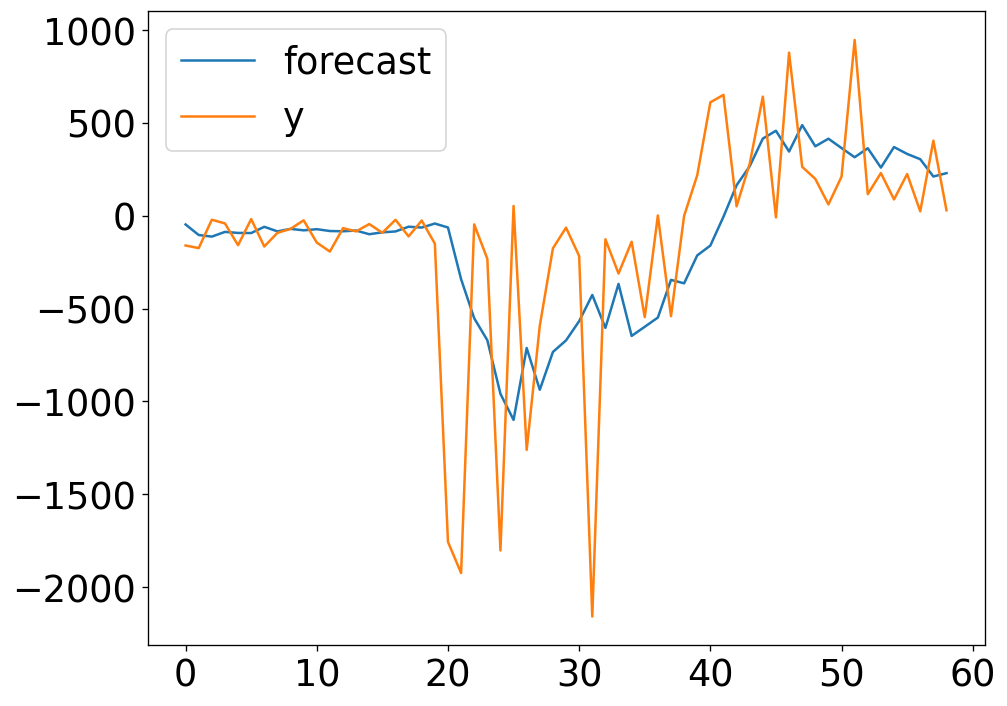

*****************
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   59
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -453.120
Method:                       css-mle   S.D. of innovations            519.353
Date:                Thu, 21 Jan 2021   AIC                            918.239
Time:                        22:09:35   BIC                            930.704
Sample:                             1   HQIC                           923.105
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8726     19.137      0.255      0.799     -32.636      42.381
ar.L1.D.y     -0.2834      0.247     -1.145      0.252      -0.768       0.202
ar.L2.D.y     -0.2658      0.199  

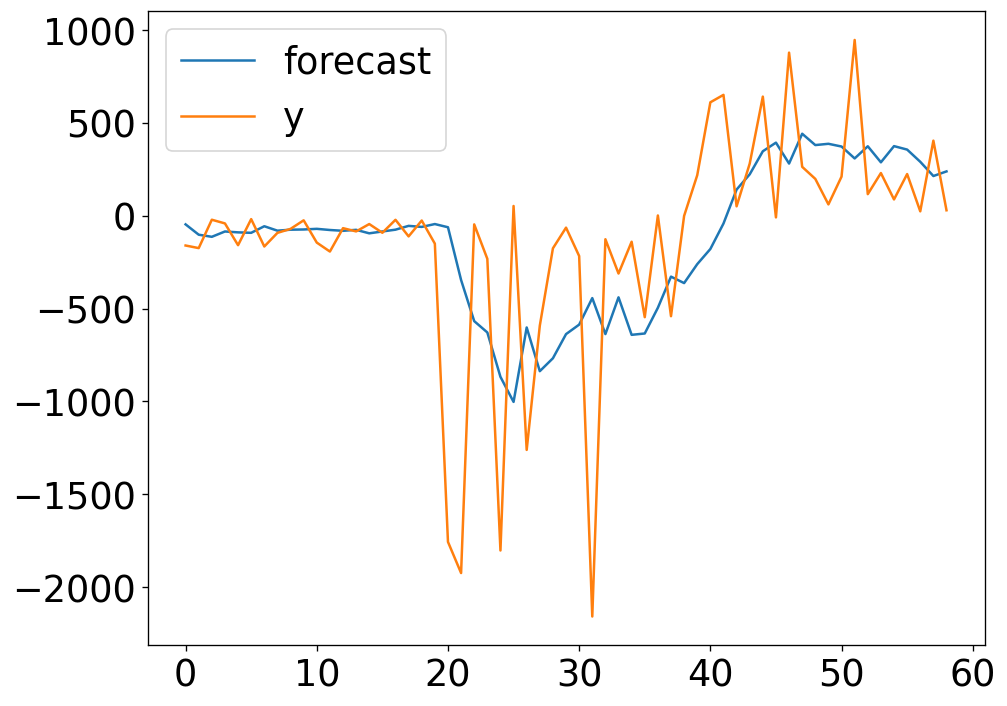

*****************
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   59
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -451.800
Method:                       css-mle   S.D. of innovations            487.698
Date:                Thu, 21 Jan 2021   AIC                            917.601
Time:                        22:09:35   BIC                            932.143
Sample:                             1   HQIC                           923.278
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3743     34.341      0.098      0.922     -63.934      70.682
ar.L1.D.y      0.4152      0.125      3.318      0.001       0.170       0.661
ar.L2.D.y     -0.4500      0.115  

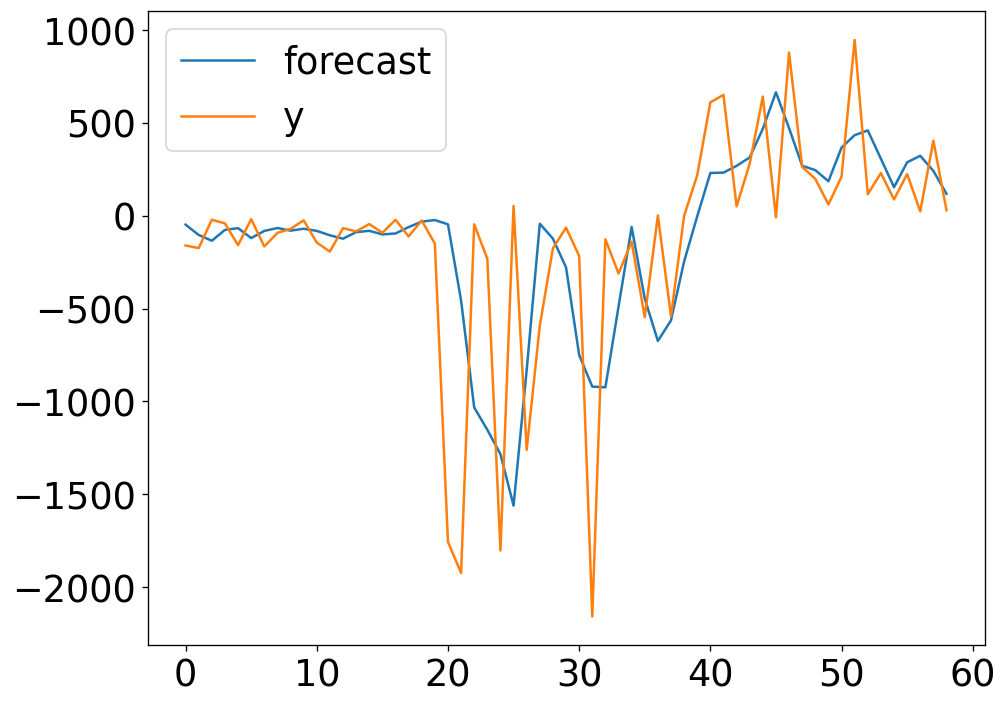

*****************


In [44]:
for p in range(1,4):
    for q in range(1,3):
        model = ARIMA(data, order=(p,1,q))
        model_fit = model.fit()
        print(model_fit.summary())
        model_fit.plot_predict(dynamic=False)
        plt.show()
        print("*****************")